In [78]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline 
#import missingno as msno #https://dev.to/tomoyukiaota/visualizing-the-patterns-of-missing-value-occurrence-with-python-46dj
#import missingno as msno


import statsmodels.formula.api as smf

In [2]:
#import data
df = pd.read_excel("C:/Users/GBTC440003ur/Desktop/Kickstarter/ks-projects-201801.xlsx")

In [3]:
df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [11]:
df.describe()

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
count,3.786610e+05,3.786610e+05,3.786610e+05,378661.000000,3.748640e+05,3.786610e+05,3.786610e+05
mean,1.074731e+09,4.908079e+04,9.682979e+03,105.617476,7.036729e+03,9.058924e+03,4.545440e+04
std,6.190862e+08,1.183391e+06,9.563601e+04,907.185035,7.863975e+04,9.097334e+04,1.152950e+06
min,5.971000e+03,1.000000e-02,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.000000e-02
25%,5.382635e+08,2.000000e+03,3.000000e+01,2.000000,1.698000e+01,3.100000e+01,2.000000e+03
50%,1.075276e+09,5.200000e+03,6.200000e+02,12.000000,3.947200e+02,6.243300e+02,5.500000e+03
75%,1.610149e+09,1.600000e+04,4.076000e+03,56.000000,3.034090e+03,4.050000e+03,1.550000e+04
max,2.147476e+09,1.000000e+08,2.033899e+07,219382.000000,2.033899e+07,2.033899e+07,1.663614e+08


In [29]:
df['state'].unique()

array(['failed', 'canceled', 'successful', 'live', 'undefined',
       'suspended'], dtype=object)

In [13]:
df.shape

(378661, 15)

SyntaxError: invalid syntax (<ipython-input-27-435162282086>, line 1)

In [6]:
#create dataframe with sucesses and failed projects only
mydf=df.copy()

In [7]:
mydf.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [20]:
#mydf[(mydf['state'] == 'cancelled') | (mydf['state']=='successful')]
#mydf2=df.loc[(mydf['state'] == "cancelled") | (mydf['state'] == 'successful')]

In [15]:
mydf.describe()

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
count,3.786610e+05,3.786610e+05,3.786610e+05,378661.000000,3.748640e+05,3.786610e+05,3.786610e+05
mean,1.074731e+09,4.908079e+04,9.682979e+03,105.617476,7.036729e+03,9.058924e+03,4.545440e+04
std,6.190862e+08,1.183391e+06,9.563601e+04,907.185035,7.863975e+04,9.097334e+04,1.152950e+06
min,5.971000e+03,1.000000e-02,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.000000e-02
25%,5.382635e+08,2.000000e+03,3.000000e+01,2.000000,1.698000e+01,3.100000e+01,2.000000e+03
50%,1.075276e+09,5.200000e+03,6.200000e+02,12.000000,3.947200e+02,6.243300e+02,5.500000e+03
75%,1.610149e+09,1.600000e+04,4.076000e+03,56.000000,3.034090e+03,4.050000e+03,1.550000e+04
max,2.147476e+09,1.000000e+08,2.033899e+07,219382.000000,2.033899e+07,2.033899e+07,1.663614e+08


In [21]:
#mydf2.shape

(133956, 15)

In [26]:
#mydf2.head

<bound method NDFrame.head of                 ID                                               name  \
5       1000014025                               Monarch Espresso Bar   
6       1000023410  Support Solar Roasted Coffee & Green Energy!  ...   
11       100005484                                   Lisa Lim New CD!   
14      1000057089  Tombstone: Old West tabletop game and miniatur...   
18      1000070642                Mike Corey's Darkness & Light Album   
20      1000072011              CMUK. Shoes: Take on Life Feet First.   
24      1000091520                        The Book Zoo - A Mini-Comic   
25      1000102741  Matt Cavenaugh & Jenny Powers make their 1st a...   
27      1000104688                                Permaculture Skills   
28      1000104953  Rebel Army Origins: The Heroic Story Of Major ...   
29       100011318                      My Moon - Animated Short Film   
31      1000117861                  Ledr workbook: one tough journal!   
32      1000120151   

In [22]:
#mydf.shape

(378661, 15)

In [24]:
#mydf2.columns

Index(['ID', 'name', 'category', 'main_category', 'currency', 'deadline',
       'goal', 'launched', 'pledged', 'state', 'backers', 'country',
       'usd pledged', 'usd_pledged_real', 'usd_goal_real'],
      dtype='object')

In [25]:
#mydf2['state'].unique()

array(['successful'], dtype=object)

In [ ]:
mydf

In [32]:
df2 = df.loc[((df['state'] == 'successful') | (df['state'] == 'failed'))]

In [33]:
df2.shape

(331675, 15)

In [34]:
df2['state'].unique()

array(['failed', 'successful'], dtype=object)

In [50]:
display(pd.crosstab(df2.category, df2.state, normalize='index'))

state,failed,successful
category,,
3D Printing,0.573944,0.426056
Academic,0.758044,0.241956
Accessories,0.608394,0.391606
Action,0.827697,0.172303
Animals,0.724891,0.275109
Animation,0.691821,0.308179
Anthologies,0.293080,0.706920
Apparel,0.770678,0.229322
Apps,0.928504,0.071496


In [37]:
pd.crosstab(df2.main_category, df2.state, normalize='index')

state,failed,successful
main_category,,
Art,0.551110,0.448890
Comics,0.408585,0.591415
Crafts,0.729470,0.270530
Dance,0.345648,0.654352
Design,0.584056,0.415944
Fashion,0.717168,0.282832
Film & Video,0.582094,0.417906
Food,0.724086,0.275914
Games,0.561095,0.438905


In [51]:
pd.options.display.max_rows = 999

In [38]:
pd.crosstab(df2.backers, df2.state)

state,failed,successful
backers,,
0,38742,105
1,29388,348
2,19881,338
3,13510,437
4,10029,473
5,7891,579
6,6359,669
7,5403,745
8,4537,839


In [40]:
pd.crosstab(df2.state,df2.backers)

backers,0,1,2,3,4,5,6,7,8,9,...,73206,73986,74405,78471,85581,87142,91585,105857,154926,219382
state,,,,,,,,,,,,,,,,,,,,,
failed,38742,29388,19881,13510,10029,7891,6359,5403,4537,3960,...,0,0,0,0,0,0,0,0,0,0
successful,105,348,338,437,473,579,669,745,839,911,...,1,1,1,1,1,1,1,1,1,1


In [44]:
nobacksuc=df2.loc[(df2['backers']==0) & (df2['state']=='successful')]

In [ ]:
df2.loc[(df2['backers']==0) & (df2['state']=='successful')] 

In [45]:
nobacksuc.shape

(105, 15)

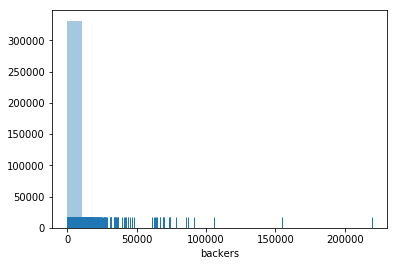

In [46]:
sns.distplot(df2['backers'], bins=20, kde=False, rug=True)

In [52]:
print(pd.crosstab(df2.category, df2.state, normalize='index'))

state                 failed  successful
category                                
3D Printing         0.573944    0.426056
Academic            0.758044    0.241956
Accessories         0.608394    0.391606
Action              0.827697    0.172303
Animals             0.724891    0.275109
Animation           0.691821    0.308179
Anthologies         0.293080    0.706920
Apparel             0.770678    0.229322
Apps                0.928504    0.071496
Architecture        0.721184    0.278816
Art                 0.547823    0.452177
Art Books           0.450790    0.549210
Audio               0.694215    0.305785
Bacon               0.790055    0.209945
Blues               0.500000    0.500000
Calendars           0.558621    0.441379
Camera Equipment    0.451429    0.548571
Candles             0.854497    0.145503
Ceramics            0.520000    0.480000
Children's Books    0.621168    0.378832
Childrenswear       0.772727    0.227273
Chiptune            0.181818    0.818182
Civic Design    

In [59]:
ct1 = pd.crosstab(df2.category, df2.state, normalize='index')

In [57]:
pd.crosstab(df2.category, df2.state).apply(percConvert, axis=1)

NameError: name 'percConvert' is not defined

In [60]:
ct1df=pd.DataFrame(ct1)

In [61]:
ct1df.columns

Index(['failed', 'successful'], dtype='object', name='state')

In [62]:
ct1df.sort_values(by='successful',ascending=0)

state,failed,successful
category,,
Chiptune,0.181818,0.818182
Residencies,0.264706,0.735294
Anthologies,0.293080,0.706920
Dance,0.304779,0.695221
Literary Spaces,0.315789,0.684211
Indie Rock,0.321073,0.678927
Classical Music,0.325000,0.675000
Letterpress,0.326087,0.673913
Tabletop Games,0.330211,0.669789


In [63]:
print(pd.crosstab(df2.main_category, df2.category, df2.state, normalize='index'))

ValueError: values cannot be used without an aggfunc.

In [64]:
dict = df2[['category', 'main_category']]

In [65]:
dict.head

<bound method NDFrame.head of                  category main_category
0                  Poetry    Publishing
1          Narrative Film  Film & Video
2          Narrative Film  Film & Video
3                   Music         Music
5             Restaurants          Food
6                    Food          Food
7                  Drinks          Food
10             Nonfiction    Publishing
11             Indie Rock         Music
12                 Crafts        Crafts
13                  Games         Games
14         Tabletop Games         Games
15                 Design        Design
16            Comic Books        Comics
17              Art Books    Publishing
18                  Music         Music
19                   Food          Food
20                Fashion       Fashion
21          Childrenswear       Fashion
22                Theater       Theater
23                 Drinks          Food
24                 Comics        Comics
25                  Music         Music
26        

In [66]:
dupe = dict.duplicated()

In [67]:
dict.loc[dupe]

,category,main_category
2,Narrative Film,Film & Video
18,Music,Music
19,Food,Food
23,Drinks,Food
25,Music,Music
28,Comics,Comics
32,Product Design,Design
34,Music,Music
35,Webseries,Film & Video
36,Indie Rock,Music


In [68]:
dict.sort_values(by=['main_category'])

,category,main_category
378660,Performance Art,Art
344577,Illustration,Art
66141,Sculpture,Art
271876,Mixed Media,Art
144239,Illustration,Art
144237,Art,Art
207319,Digital Art,Art
364823,Public Art,Art
207326,Conceptual Art,Art
207327,Illustration,Art


In [71]:
ct1df2=pd.merge(ct1df, dict, how = 'left', on = 'category')

In [72]:
print(ct1df2)

           category    failed  successful main_category
0       3D Printing  0.573944    0.426056    Technology
1       3D Printing  0.573944    0.426056    Technology
2       3D Printing  0.573944    0.426056    Technology
3       3D Printing  0.573944    0.426056    Technology
4       3D Printing  0.573944    0.426056    Technology
5       3D Printing  0.573944    0.426056    Technology
6       3D Printing  0.573944    0.426056    Technology
7       3D Printing  0.573944    0.426056    Technology
8       3D Printing  0.573944    0.426056    Technology
9       3D Printing  0.573944    0.426056    Technology
10      3D Printing  0.573944    0.426056    Technology
11      3D Printing  0.573944    0.426056    Technology
12      3D Printing  0.573944    0.426056    Technology
13      3D Printing  0.573944    0.426056    Technology
14      3D Printing  0.573944    0.426056    Technology
15      3D Printing  0.573944    0.426056    Technology
16      3D Printing  0.573944    0.426056    Tec

In [73]:
df2.groupby('state').mean()

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
state,,,,,,,
failed,1.074639e+09,67346.845539,1426.971450,16.422352,1133.741030,1320.603817,63174.742222
successful,1.073727e+09,10162.960544,24099.779097,263.921362,17356.034449,22670.795231,9532.853357


In [74]:
df2.pivot_table(df2, index=['state'])

,ID,backers,goal,pledged,usd pledged,usd_goal_real,usd_pledged_real
state,,,,,,,
failed,1.074639e+09,16.422352,67346.845539,1426.971450,1133.741030,63174.742222,1320.603817
successful,1.073727e+09,263.921362,10162.960544,24099.779097,17356.034449,9532.853357,22670.795231


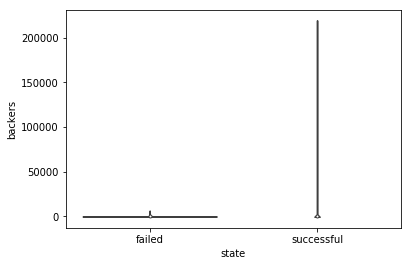

In [75]:
sns.violinplot(x='state', y='backers', data=df2)

In [76]:
df2.groupby(['state','backers']).mean()

ID          goal       pledged   usd pledged  \
state      backers                                                           
failed     0        1.078564e+09  9.126197e+04  1.550311e+00  2.551314e-01   
           1        1.072916e+09  8.888601e+04  4.303282e+01  3.158560e+01   
           2        1.067001e+09  8.991160e+04  9.444194e+01  7.262010e+01   
           3        1.082495e+09  6.602619e+04  1.507858e+02  1.188946e+02   
           4        1.070141e+09  6.800126e+04  2.533781e+02  1.859641e+02   
           5        1.068217e+09  7.377334e+04  3.155381e+02  2.469656e+02   
           6        1.071021e+09  4.842774e+04  4.155648e+02  3.226998e+02   
           7        1.075475e+09  4.207264e+04  4.939911e+02  3.849343e+02   
           8        1.076224e+09  4.256528e+04  6.761405e+02  4.760574e+02   
           9        1.074287e+09  2.549804e+04  7.109866e+02  5.066334e+02   
           10       1.075840e+09  3.224864e+04  8.290364e+02  6.051712e+02   
           11       1.077407e+09  2.732685e+04  9.062631e+02  6.601842e+02   
           12       1.071308e+09  2.950848e+04  9.954074e+02  7.435149e+02   
           13       1.083195e+09  2.573178e+04  1.084753e+03  8.543983e+02   
           14       1.067272e+09  2.913806e+04  1.218139e+03  9.378866e+02   
           15       1.072106e+09  4.698102e+04  1.316439e+03  1.023371e+03   
           16       1.060518e+09  2.663471e+04  1.332845e+03  1.036417e+03   
           17       1.081951e+09  2.937334e+04  1.532925e+03  1.185300e+03   
           18       1.081970e+09  2.593857e+04  1.555258e+03  1.201689e+03   
           19       1.040854e+09  2.569723e+04  1.664784e+03  1.302101e+03   
           20       1.041434e+09  2.357593e+04  1.856086e+03  1.432447e+03   
           21       1.059656e+09  2.550028e+04  2.043422e+03  1.414184e+03   
           22       1.050411e+09  3.128892e+04  1.895276e+03  1.494142e+03   
           23       1.083059e+09  2.135792e+04  1.954386e+03  1.610882e+03   
           24       1.036997e+09  3.877116e+04  2.387154e+03  1.776005e+03   
           25       1.061612e+09  2.639831e+04  2.773073e+03  1.685062e+03   
           26       1.024989e+09  4.987866e+04  2.385971e+03  1.892088e+03   
           27       1.066478e+09  1.441544e+05  2.299044e+03  1.844180e+03   
           28       1.107691e+09  3.616652e+04  2.808268e+03  2.177643e+03   
           29       1.099435e+09  3.417898e+04  2.784275e+03  2.061858e+03   
           30       1.137878e+09  2.327590e+04  2.709070e+03  2.201085e+03   
           31       1.055415e+09  2.985990e+04  3.262493e+03  2.325951e+03   
           32       1.027121e+09  2.920013e+04  3.102997e+03  2.486072e+03   
           33       1.053565e+09  3.815547e+04  3.092930e+03  2.341816e+03   
           34       1.107480e+09  3.310486e+04  3.381465e+03  2.633287e+03   
           35       1.050741e+09  3.077491e+04  3.562722e+03  2.622988e+03   
           36       1.092670e+09  3.080869e+04  3.647770e+03  2.701736e+03   
           37       1.054437e+09  3.091164e+04  3.559152e+03  3.034042e+03   
           38       1.081019e+09  6.587370e+04  3.503982e+03  3.008999e+03   
           39       1.093176e+09  3.107366e+04  3.727260e+03  3.076478e+03   
           40       1.101598e+09  4.639873e+04  3.811127e+03  3.204697e+03   
           41       1.116927e+09  3.586533e+04  4.463901e+03  2.886327e+03   
           42       1.072075e+09  2.942655e+04  3.547011e+03  2.968553e+03   
           43       1.088937e+09  3.239788e+04  4.999808e+03  3.282367e+03   
           44       1.031885e+09  4.415592e+04  4.242161e+03  3.347929e+03   
           45       1.110745e+09  3.400265e+04  4.265771e+03  3.758116e+03   
           46       1.114311e+09  3.364666e+04  4.339357e+03  3.743046e+03   
           47       1.117284e+09  3.099162e+04  4.931767e+03  3.531911e+03   
           48       1.105055e+09  2.774169e+04  4.476524e+03  3.767077e+03   
           49       1.088654e+09  3.029959e+04  4.33

In [79]:
result1 = smf.ols('state ~ category + backers + usd_pledged_real + usd_goal_real', data=df2).fit()

In [81]:
result1.summary

<bound method RegressionResults.summary of <statsmodels.regression.linear_model.OLSResults object at 0x00000169BDA46E10>>

In [83]:
df2.corr()

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
ID,1.000000,0.001900,0.000852,0.000838,-0.000289,0.000287,0.001844
goal,0.001900,1.000000,0.007965,0.004794,0.006416,0.005955,0.952614
pledged,0.000852,0.007965,1.000000,0.717316,0.857966,0.953571,0.005722
backers,0.000838,0.004794,0.717316,1.000000,0.697493,0.752291,0.005208
usd pledged,-0.000289,0.006416,0.857966,0.697493,1.000000,0.907713,0.006965
usd_pledged_real,0.000287,0.005955,0.953571,0.752291,0.907713,1.000000,0.006354
usd_goal_real,0.001844,0.952614,0.005722,0.005208,0.006965,0.006354,1.000000


In [86]:
#create percent achieved (USD_pledge_real/ usd_goal_real variable
df2['pctach'] = df2['usd_pledged_real']/df2['usd_goal_real']

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [88]:
df2.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,pctach
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95,0.000000
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00,0.080700
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00,0.004889
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00,0.000200
5,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26 13:38:27,52375.0,successful,224,US,52375.0,52375.0,50000.00,1.047500


In [89]:
result2 = smf.ols('state ~ category + backers + pctach', data=df2).fit()

In [90]:
result2.summary()

ValueError: shapes (331675,2) and (331675,2) not aligned: 2 (dim 1) != 331675 (dim 0)